<a href="https://colab.research.google.com/github/gabipalacios/Python/blob/main/TFPython2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metadatos

El dataset analizado contiene 15.157 registros y seis columnas que se detallan:

**id**: número entero secuencial que indentifica de forma única un registro comenzando en 1.

**edad**: corresponde a la edad expresada en años. Tipo de dato: numérico entero. Valores que toma: entre 15 y 19.

**anios_educ**: años de educación recibida. Tipo de dato: numérico entero. Valores que toma: entre 6 y 12.

**en_pareja**: indica si la persona está en pareja o no. Tipo de dato: numérico entero. Valores que toma: 0 (No) 1 (Sí).????? Chequear

**num_hijos**: corresponde al número de hijos del adolescente. Tipo de dato: numérico entero. Valores que toma: entre 0 y 3.

**bajo_socioecon**: indica si el nivel socioeconómico es bajo o no. Tipo de dato: numérico entero. Valores que toma 0 (No) 1 (Sí). ?????? Chequear


## QUE ES EL DATASET?

In [40]:
#Importación de librerías básicas y de visualizacion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#Importa el dataset inicial, solicitando se considere el id propio.
df = pd.read_excel(
    '/content/drive/MyDrive/Academia/Python/Intro2025python/TFINAL/Educacion_Sexual.xlsx',index_col="id")


##Análisis de estrtructura del Dataset:

In [43]:
#Volumen del dataset:
df.shape

(15157, 5)

In [44]:
#Revisar si tiene valores faltantes, para corregir o dropear si corresponde.
df.isnull().sum()

,0
edad,0
anios_educ,0
en_pareja,0
num_hijos,0
bajo_socioecon,0


In [45]:
#Tipos de datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15157 entries, 1 to 15157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   edad            15157 non-null  int64
 1   anios_educ      15157 non-null  int64
 2   en_pareja       15157 non-null  int64
 3   num_hijos       15157 non-null  int64
 4   bajo_socioecon  15157 non-null  int64
dtypes: int64(5)
memory usage: 710.5 KB


In [46]:
#Extraer una parte del dataset para conocer la estructura
df.head()#sample()

,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon
id,,,,,
1,18,9,0,0,1
2,16,7,0,0,1
3,15,9,0,0,1
4,17,9,1,0,0
5,18,9,1,0,0


In [47]:
#Análisis descriptivo de las variables numéricas
df.describe()

,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,16.962064,8.506763,0.161707,0.150887,0.250049
std,1.413214,1.176005,0.368194,0.409855,0.433056
min,15.000000,6.000000,0.000000,0.000000,0.000000
25%,16.000000,8.000000,0.000000,0.000000,0.000000
50%,17.000000,9.000000,0.000000,0.000000,0.000000
75%,18.000000,9.000000,0.000000,0.000000,1.000000
max,19.000000,12.000000,1.000000,3.000000,1.000000


##Revisión inicial
Se observa que es un dataset que no requiere mayor mantenimiento.
Contiene 5 variables a anlizar, con datos completos y en formato numérico.
En la descripción y cuartiles no parece tener anomalías que afecten el análisis.

In [48]:
#Distribución por categoría de:
df.value_counts('edad')

,count
edad,
15,3135
16,3119
17,2998
18,2996
19,2909


In [49]:
#Distribución por categoría de:
df.value_counts('anios_educ')

,count
anios_educ,
9,7658
7,3394
8,3105
12,778
11,93
10,71
6,58


In [50]:
#Distribución por categoría de:
df.value_counts('num_hijos')

,count
num_hijos,
0,13153
1,1740
2,245
3,19


In [51]:
#Distribución por categoría de:
df.value_counts('bajo_socioecon')

,count
bajo_socioecon,
0,11367
1,3790


In [52]:
#Distribución por categoría de:
df.value_counts('en_pareja')

,count
en_pareja,
0,12706
1,2451


In [53]:
#Se muestran las columnas para facilitar la selección y graficar, boxplot
df.columns

Index(['edad', 'anios_educ', 'en_pareja', 'num_hijos', 'bajo_socioecon'], dtype='object')

##Se analizan de forma gráfica las 3 variables no binarias

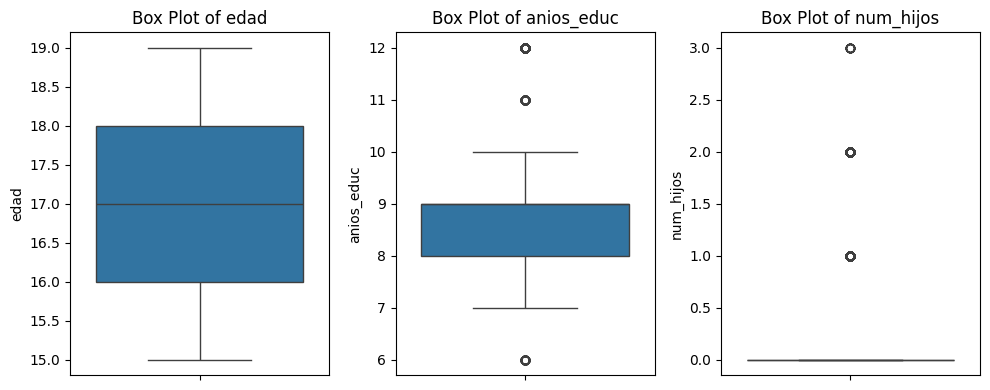

In [54]:
#Tomo las variables que no son binarias y analizo quantiles y outliers:

variables = ['edad', 'anios_educ','num_hijos']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

- Edad: No presenta outliers, parece una distribución equitativa entre las edades.
- Educ: Se conentran los datos entre 8 y 9 años, luce como una distribución normal, dato que que vamos a corroborar en histograma, tiene outliers (datos que se encuentra fuera de los limites del rango intercuartilico).
- Hijos, se observa una concentración en 0, y de manera aislada los otros rangos, dada su distribución se puede esperar alguna modificación de la variable para obtener mejores conclusiones.

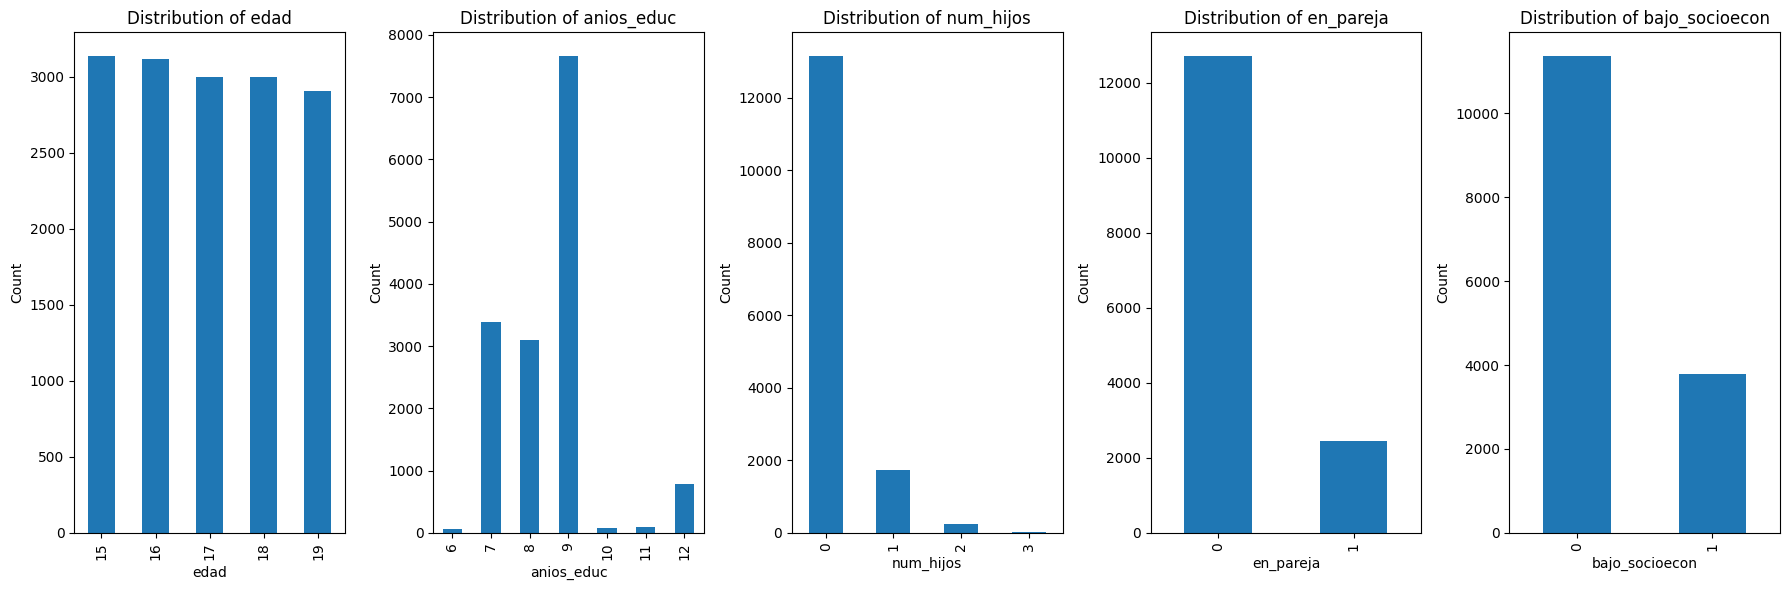

In [55]:
variables = ['edad', 'anios_educ','num_hijos','en_pareja','bajo_socioecon']

fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Iterate through the variables and create the bar plots
for i, var in enumerate(variables):
  # Since axes is 1-dimensional, access it using a single index:
  ax = axes[i]
  df.groupby(var).size().plot.bar(ax=ax)
  ax.set_title(f'Distribution of {var}')
  ax.set_xlabel(var)
  ax.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Confirmamos las sospechas en cuanto a la distribución de las variables.
Realizaremos modificación en 'num_hijos' para obtener mejores conclusiones.

In [56]:
#Analizamos la correlación de todas las variables.
corr_df = df[['edad', 'anios_educ','num_hijos','en_pareja','bajo_socioecon']].corr()
corr_df

,edad,anios_educ,num_hijos,en_pareja,bajo_socioecon
edad,1.000000,0.040193,0.270632,0.245869,0.020460
anios_educ,0.040193,1.000000,0.153597,0.154045,-0.000989
num_hijos,0.270632,0.153597,1.000000,0.601265,0.019753
en_pareja,0.245869,0.154045,0.601265,1.000000,0.013295
bajo_socioecon,0.020460,-0.000989,0.019753,0.013295,1.000000


##Resultado correlación
No se observan correlaciones marcadas, las más correlaciónadas tienen que ver con la edad y num_hijos o en_pareja.

<Axes: >

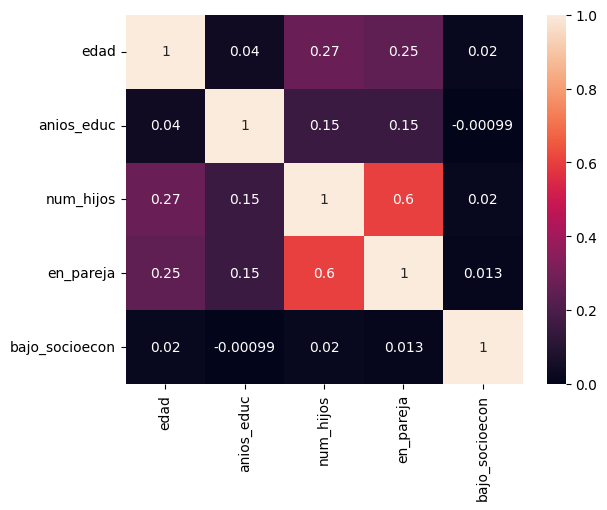

In [57]:
#Gráficamente correlación
sns.heatmap(corr_df, annot=True)

##Transformación del campo ['num_hijos']
Analizamos detalle del campo ['num_hijos'], vemos que dentro de la muestra hay pocos datos con valores de 2 y 3, por lo que creemos conveniente reagrupar.

In [58]:
#Creamos un nuevo DataFrame para mostrar cuantos registros tienen cada 'valor' de hijos.
num_hijos_counts = df.groupby('num_hijos').size().reset_index(name='cantidad')
#Calculo el valor total por segmento
total_count = num_hijos_counts['cantidad'].sum()
#Creo el campo de '%' especifico para este dataframe
num_hijos_counts['%'] = (num_hijos_counts['cantidad'] / total_count) * 100
num_hijos_counts

,num_hijos,cantidad,%
0,0,13153,86.778386
1,1,1740,11.479844
2,2,245,1.616415
3,3,19,0.125355


In [59]:
#Utilizamos el método .apply() sobre el campo ['num_hijos'], que transforma los valores según
# la condición a cada columna, complementando con la función 'lambda' que define la función condicional.
df['num_hijos_bin'] = df['num_hijos'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin
id,,,,,,
1,18,9,0,0,1,0
2,16,7,0,0,1,0
3,15,9,0,0,1,0
4,17,9,1,0,0,0
5,18,9,1,0,0,0


##Observaciones del campo ['IndiceEduc']
Consideramos que la variable puede estar sesgada en relación a la edad, dado que por ejemplo, no sería comprable 8 años de estudio para una persona de 15 años que con otra de 19 años.

In [61]:
# prompt: desccribe para 1 sola variable

df['anios_educ'].describe()

,anios_educ
count,15157.000000
mean,8.506763
std,1.176005
min,6.000000
25%,8.000000
50%,9.000000
75%,9.000000
max,12.000000


In [19]:
df['IndiceEduc'] = df['anios_educ']/(df['edad']-3)

In [ ]:
# En función de las tranformaciones anteriores,

df = df.drop(['anios_educ', 'num_hijos'], axis=1)

In [21]:
registros_con_valor= df[df['IndiceEduc'] == 1]
registros_con_valor

,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,IndiceEduc
id,,,,,,
221,15,12,0,0,0,1.0
230,15,12,0,0,0,1.0
706,15,12,0,1,1,1.0
761,15,12,0,0,1,1.0
929,15,12,0,0,0,1.0
...,...,...,...,...,...,...
14540,15,12,0,0,0,1.0
14610,15,12,0,0,1,1.0
14806,15,12,0,0,0,1.0


In [22]:
df.value_counts('IndiceEduc',ascending=True)

,count
IndiceEduc,
0.400000,9
0.375000,10
0.625000,10
0.714286,10
0.428571,12
0.461538,13
0.833333,14
0.785714,15
0.916667,16
